### 1: Importing Libraries

In [3]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### 2:Loading the datasets


In [4]:
data=pd.read_csv("diabetes.csv")

### 3:.Display Top 5 Rows of the Dataset

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 4:Find shape of the dataset (No of rows and columns)

In [6]:
data.shape

(768, 9)

### 5:Getting the Information of the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 6:Checking null value of the dataset

In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 7: Checking the duplicates value in the data set

In [9]:
data.duplicated().sum()

0

### The histagram of the Age variable was reached.


<AxesSubplot:>

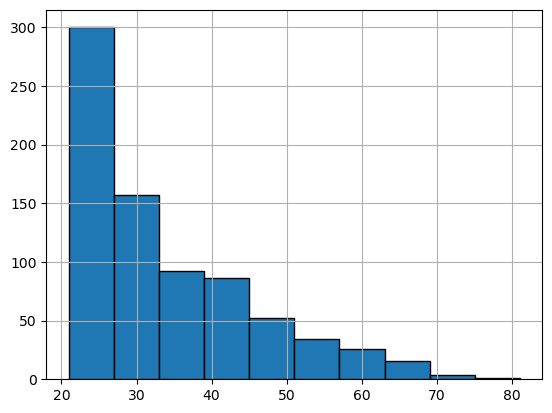

In [37]:
data["Age"].hist(edgecolor = "black")

### 8: Handling Imbalanced data

As you can see most columns contain 0 in there columns so we replaced that 0 with nan then replace that value with
the mean of the respective column

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
import numpy as np

In [12]:
data_copy=data.copy(deep=True)

In [13]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
data_copy[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']]=data_copy[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0,np.nan)

In [15]:
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [16]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

In [17]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1


### 9:Store Feature matrix in X and output value in y vector

In [18]:
X=data.drop(['Outcome'],axis=1)
y=data['Outcome']

### 10: Spliting the data into training set and test set

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### 10:Scikit-Learn Pipeline

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline

In [22]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),('lr_Classifier',LogisticRegression())])

pipeline_knn=Pipeline([('scalar2',StandardScaler()),('knn_Classifier',KNeighborsClassifier())])

pipeline_svc=Pipeline([('scalar3',StandardScaler()),('svc_Classifier',SVC())])

pipeline_dt=Pipeline([('scalar4',StandardScaler()),('dt_Classifier',DecisionTreeClassifier())])

pipeline_rf=Pipeline([('scalar5',StandardScaler()),('rf_Classifier',RandomForestClassifier(max_depth=3))])

pipeline_gbc=Pipeline([('scalar6',StandardScaler()),('gbc_Classifier',GradientBoostingClassifier())])

In [23]:


pipelines=[pipeline_lr,pipeline_knn,pipeline_svc,pipeline_dt,pipeline_rf,pipeline_gbc]


In [24]:
pipelines

[Pipeline(steps=[('scalar1', StandardScaler()),
                 ('lr_Classifier', LogisticRegression())]),
 Pipeline(steps=[('scalar2', StandardScaler()),
                 ('knn_Classifier', KNeighborsClassifier())]),
 Pipeline(steps=[('scalar3', StandardScaler()), ('svc_Classifier', SVC())]),
 Pipeline(steps=[('scalar4', StandardScaler()),
                 ('dt_Classifier', DecisionTreeClassifier())]),
 Pipeline(steps=[('scalar5', StandardScaler()),
                 ('rf_Classifier', RandomForestClassifier(max_depth=3))]),
 Pipeline(steps=[('scalar6', StandardScaler()),
                 ('gbc_Classifier', GradientBoostingClassifier())])]

In [25]:
for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [26]:
pipe_dict={0:'LR',1:'KNN',2:'SVC',3:'DT',4:'RF',5:'GBC'}

In [27]:
pipe_dict

{0: 'LR', 1: 'KNN', 2: 'SVC', 3: 'DT', 4: 'RF', 5: 'GBC'}

In [28]:
for i , model in enumerate(pipelines):
      print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)*100))

LR Test Accuracy:76.62337662337663
KNN Test Accuracy:76.62337662337663
SVC Test Accuracy:73.37662337662337
DT Test Accuracy:70.12987012987013
RF Test Accuracy:79.22077922077922
GBC Test Accuracy:76.62337662337663


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
X=data.drop('Outcome',axis=1)
y=data['Outcome']

In [31]:
rf=RandomForestClassifier(max_depth=3)

In [32]:
rf.fit(X,y)

RandomForestClassifier(max_depth=3)

# Prediction on new data

In [33]:
new_value=pd.DataFrame({
        'Pregnancies':7,
         'Glucose':148.0,
        'BloodPressure':73.0,
        'SkinThickness':35.0,
        'Insulin':80.00123,
        'BMI':33.6,
        'DiabetesPedigreeFunction':0.627,
        'Age':50,
    },index=[0])

In [34]:
p=rf.predict(new_value)

In [35]:
if p[0]==0:
     print('Non Diabetic Patient')
else:
     print('Diabetic Patient')

Diabetic Patient
